In [7]:
import pandas as pd
import os

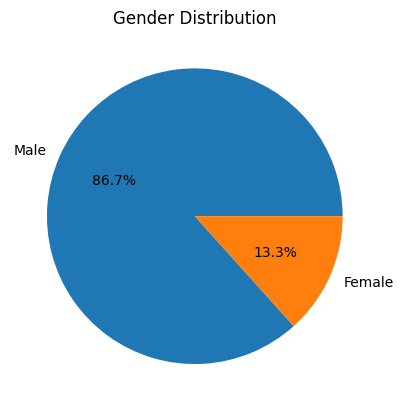

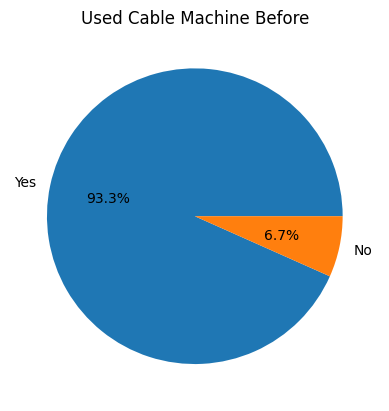

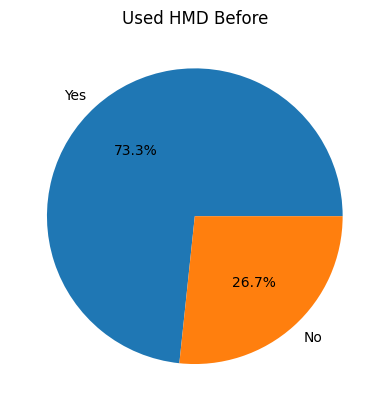

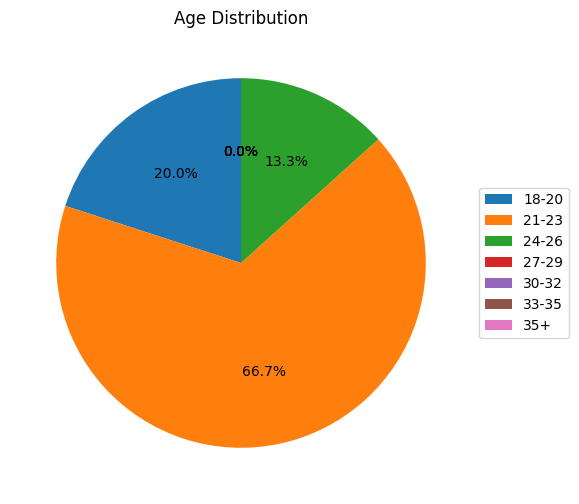

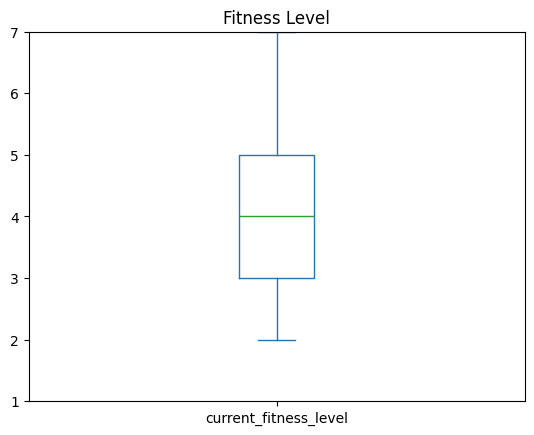

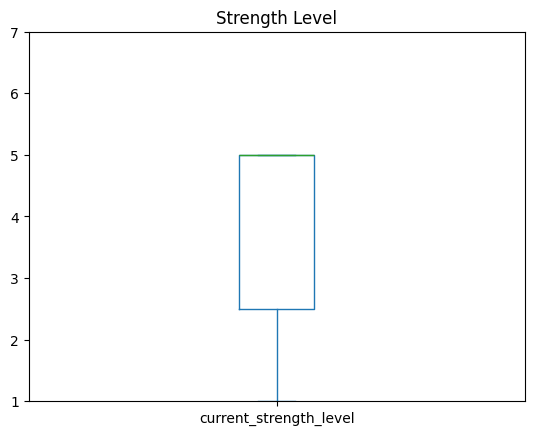

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv('../ProcessedData/pre_df.csv')

# Gender distribution pie chart
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.ylabel('')
plt.show()

# Used cable machine before pie chart
df['used_cable_machine_before'].value_counts().plot(
    kind='pie', labels=['Yes', 'No'], autopct='%1.1f%%', title='Used Cable Machine Before'
)
plt.ylabel('')
plt.show()

# Used HMD before pie chart
df['used_hmd_before'].value_counts().plot(
    kind='pie', labels=['Yes', 'No'], autopct='%1.1f%%', title='Used HMD Before'
)
plt.ylabel('')
plt.show()

# Age distribution pie chart with legend
age_order = ['18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '35+']
age_counts = df['age'].value_counts().reindex(age_order, fill_value=0)
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(age_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution')
plt.legend(patches, age_order, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('')
plt.show()

df['current_fitness_level'].plot(kind='box', title='Fitness Level')
plt.ylim(1, 7)
plt.show()

df['current_strength_level'].plot(kind='box', title='Strength Level')
plt.ylim(1, 7)
plt.show()

In [9]:
from scipy.stats import friedmanchisquare, wilcoxon

conditions = ['No Music', 'Non Sync', 'Sync']

pos_enjoyment_cols = [
    'experience_fun',
    'experience_interesting',
    'enjoyed_experience',
    'enjoy_exercising_more',
    'willing_to_do_again',
    'enjoyed_experience_2',
    'activity_enjoyable'
]

neg_enjoyment_cols = [
    'boring_experience',
    'did_not_hold_attention'
]

pos_effort_cols = [
    'tried_hard',
    'effort_input',
    'important_to_do_well'
]

neg_effort_cols = [
    'did_not_try_hard',
    'did_not_put_energy'
]

exertion_col = 'exertion'

enjoyment_df = pd.DataFrame(columns=['player', 'condition','score', 'enjoyment', 'exertion', 'effort'])

for condition in conditions:
    path = os.path.join('../ProcessedData', condition, 'post_df.csv')
    df = pd.read_csv(path)
    for _, row in df.iterrows():
        enjoyment_score = row[pos_enjoyment_cols].sum() - row[neg_enjoyment_cols].sum()
        exertion_score = row[exertion_col]
        effort_score = row[pos_effort_cols].sum() - row[neg_effort_cols].sum()
        player_name = row['name'].split()[0].lower()
        game_df = pd.read_csv(os.path.join('../ProcessedData', condition, f"{player_name}.csv"))
        score = game_df['score'].max()
        new_row = {'player': player_name, 'condition': condition, 'score':int(score), 'enjoyment': float(enjoyment_score), 'exertion': float(exertion_score), 'effort': float(effort_score)}
        enjoyment_df = pd.concat([enjoyment_df, pd.DataFrame([new_row])], ignore_index=True)

enjoyment_df = enjoyment_df.astype({'player': 'str', 'condition': 'str', 'score': 'Int64', 'enjoyment': 'float', 'exertion': 'float', 'effort': 'float'})

print("Overall:")
print(enjoyment_df)
print()


enjoyment_wide = enjoyment_df.pivot(index='player', columns='condition', values='enjoyment')
exertion_wide = enjoyment_df.pivot(index='player', columns='condition', values='exertion')
score_wide = enjoyment_df.pivot(index='player', columns='condition', values='score')
effort_wide = enjoyment_df.pivot(index='player', columns='condition', values='effort')

print("Enjoyment Table:")
print(enjoyment_wide)
print()
print("Exertion Table:")
print(exertion_wide)
print()
print("Score Table:")
print(score_wide)
print()
print("Effort Table:")
print(effort_wide)
print()

enjoyment_nm = enjoyment_wide['No Music']
enjoyment_ns = enjoyment_wide['Non Sync']
enjoyment_sy = enjoyment_wide['Sync']

exertion_nm = exertion_wide['No Music']
exertion_ns = exertion_wide['Non Sync']
exertion_sy = exertion_wide['Sync']

score_nm = score_wide['No Music']
score_ns = score_wide['Non Sync']
score_sy = score_wide['Sync']

effort_nm = effort_wide['No Music']
effort_ns = effort_wide['Non Sync']
effort_sy = effort_wide['Sync']

def friedman_test(data1, data2, data3, measure):
    stat, p = friedmanchisquare(data1, data2, data3)
    print(f"\t{measure}: statistic={stat:.3f}, p-value={p:.4f}")

print("Friedman Test:")
friedman_test(enjoyment_nm, enjoyment_ns, enjoyment_sy, "Enjoyment")
friedman_test(exertion_nm, exertion_ns, exertion_sy, "Exertion")
friedman_test(score_nm, score_ns, score_sy, "Score")
friedman_test(effort_nm, effort_ns, effort_sy, "Effort")

print()

def wilcoxon_test(data1, data2, measure):
    diff = data1 - data2
    if (diff != 0).any():
        w_stat, w_p = wilcoxon(data1, data2)
        print(f"\t{measure}: statistic={w_stat:.3f}, p-value={w_p:.4f}")
    else:
        print(f"\tWilcoxon test not applicable for {measure}")

print("Wilcoxon Signed-rank Test:")
print("\t(No Music vs Sync)")
wilcoxon_test(enjoyment_nm, enjoyment_sy, "Enjoyment")
wilcoxon_test(exertion_nm, exertion_sy, "Exertion")
wilcoxon_test(score_nm, score_sy, "Score")
wilcoxon_test(effort_nm, effort_sy, "Effort")

print()

print("\t(No Music vs Non Sync)")
wilcoxon_test(enjoyment_nm, enjoyment_ns, "Enjoyment")
wilcoxon_test(exertion_nm, exertion_ns, "Exertion")
wilcoxon_test(score_nm, score_ns, "Score")
wilcoxon_test(effort_nm, effort_ns, "Effort")

print()

print("\t(Non Sync vs Sync)")
wilcoxon_test(enjoyment_ns, enjoyment_sy, "Enjoyment")
wilcoxon_test(exertion_ns, exertion_sy, "Exertion")
wilcoxon_test(score_ns, score_sy, "Score")
wilcoxon_test(effort_ns, effort_sy, "Effort")

print()

Overall:
      player condition  score  enjoyment  exertion  effort
0     gallon  No Music   6368       17.0      17.0    12.0
1     joshua  No Music   3576       -8.0      11.0    12.0
2        ann  No Music   2624       16.0      13.0     6.0
3   benjamin  No Music   5512       17.0      18.0    13.0
4       john  No Music   2592      -16.0      17.0    10.0
5    stephen  No Music   5232       16.0      14.0     7.0
6      jacob  No Music   4128       27.0      16.0    11.0
7     steven  No Music   3096       21.0      12.0     9.0
8     amanda  No Music   3184       15.0      12.0    14.0
9    raymond  No Music    272       27.0      16.0    15.0
10     aidan  No Music   4120        9.0      13.0     6.0
11      owen  No Music   2376       22.0      12.0     4.0
12    gallon  Non Sync   5376       13.0      17.0    12.0
13    joshua  Non Sync   3000       -4.0      13.0    14.0
14       ann  Non Sync   2648       13.0      14.0     6.0
15  benjamin  Non Sync   4456       15.0      1

C:\Users\eason\AppData\Local\Temp\ipykernel_24588\280574756.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enjoyment_df = pd.concat([enjoyment_df, pd.DataFrame([new_row])], ignore_index=True)


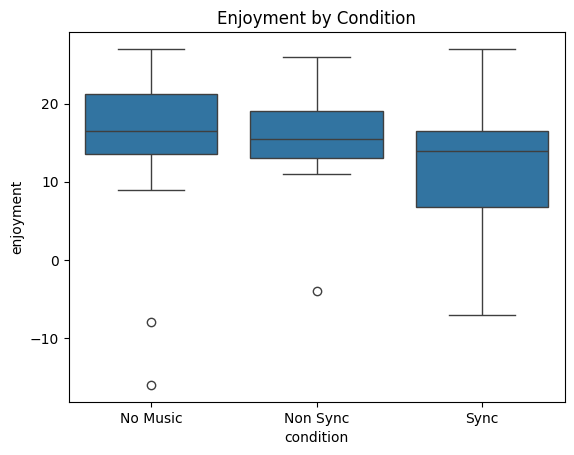

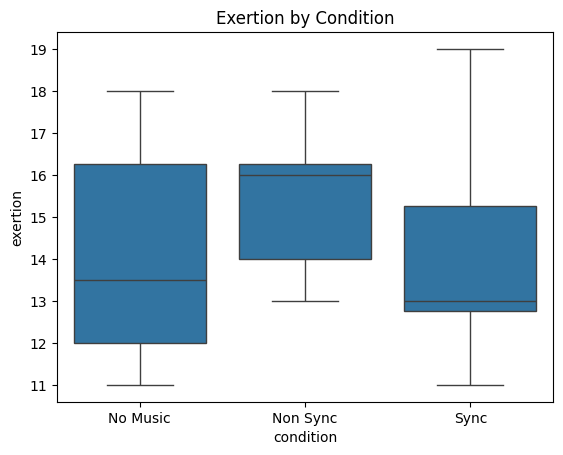

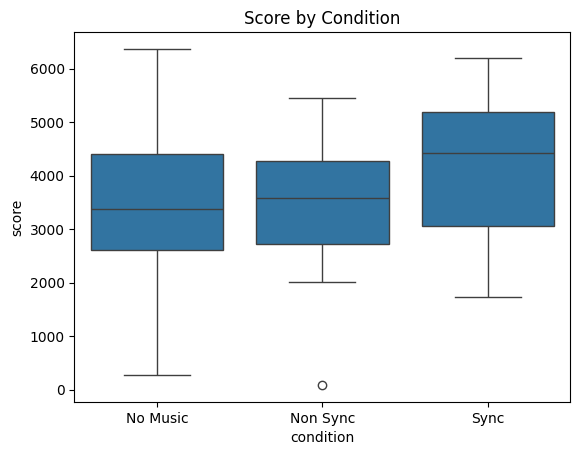

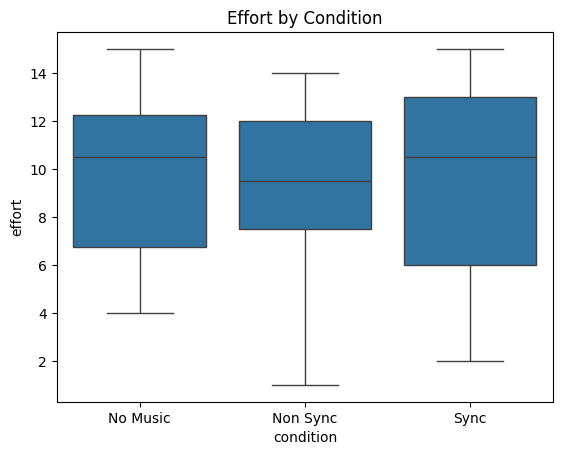

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='condition', y='enjoyment', data=enjoyment_df)
plt.title('Enjoyment by Condition')
plt.show()

sns.boxplot(x='condition', y='exertion', data=enjoyment_df)
plt.title('Exertion by Condition')
plt.show()

sns.boxplot(x='condition', y='score', data=enjoyment_df)
plt.title('Score by Condition')
plt.show()

sns.boxplot(x='condition', y='effort', data=enjoyment_df)
plt.title('Effort by Condition')
plt.show()